In [2]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline

In [3]:
#1
ds = xr.open_dataset("200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc", 
                     engine="netcdf4")
methane=ds['xch4']
print("甲烷浓度最小值/最大值:", float(methane.min()), float(methane.max()))
#根据该网站https://svs.gsfc.nasa.gov/5007所给的图进行数据清洗
#清除缺失值
methane_=methane.where(methane<1e+20)
#将单位换成ppb
methane_1=methane_*1e+9
print("甲烷浓度最小值/最大值:", float(methane_.min()), float(methane_.max()))

甲烷浓度最小值/最大值: 1.5669854747102363e-06 1.0000000200408773e+20
甲烷浓度最小值/最大值: 1.5669854747102363e-06 1.9994758986285888e-06


C:\Users\啊小婷\AppData\Local\Temp\ipykernel_15664\2216736983.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


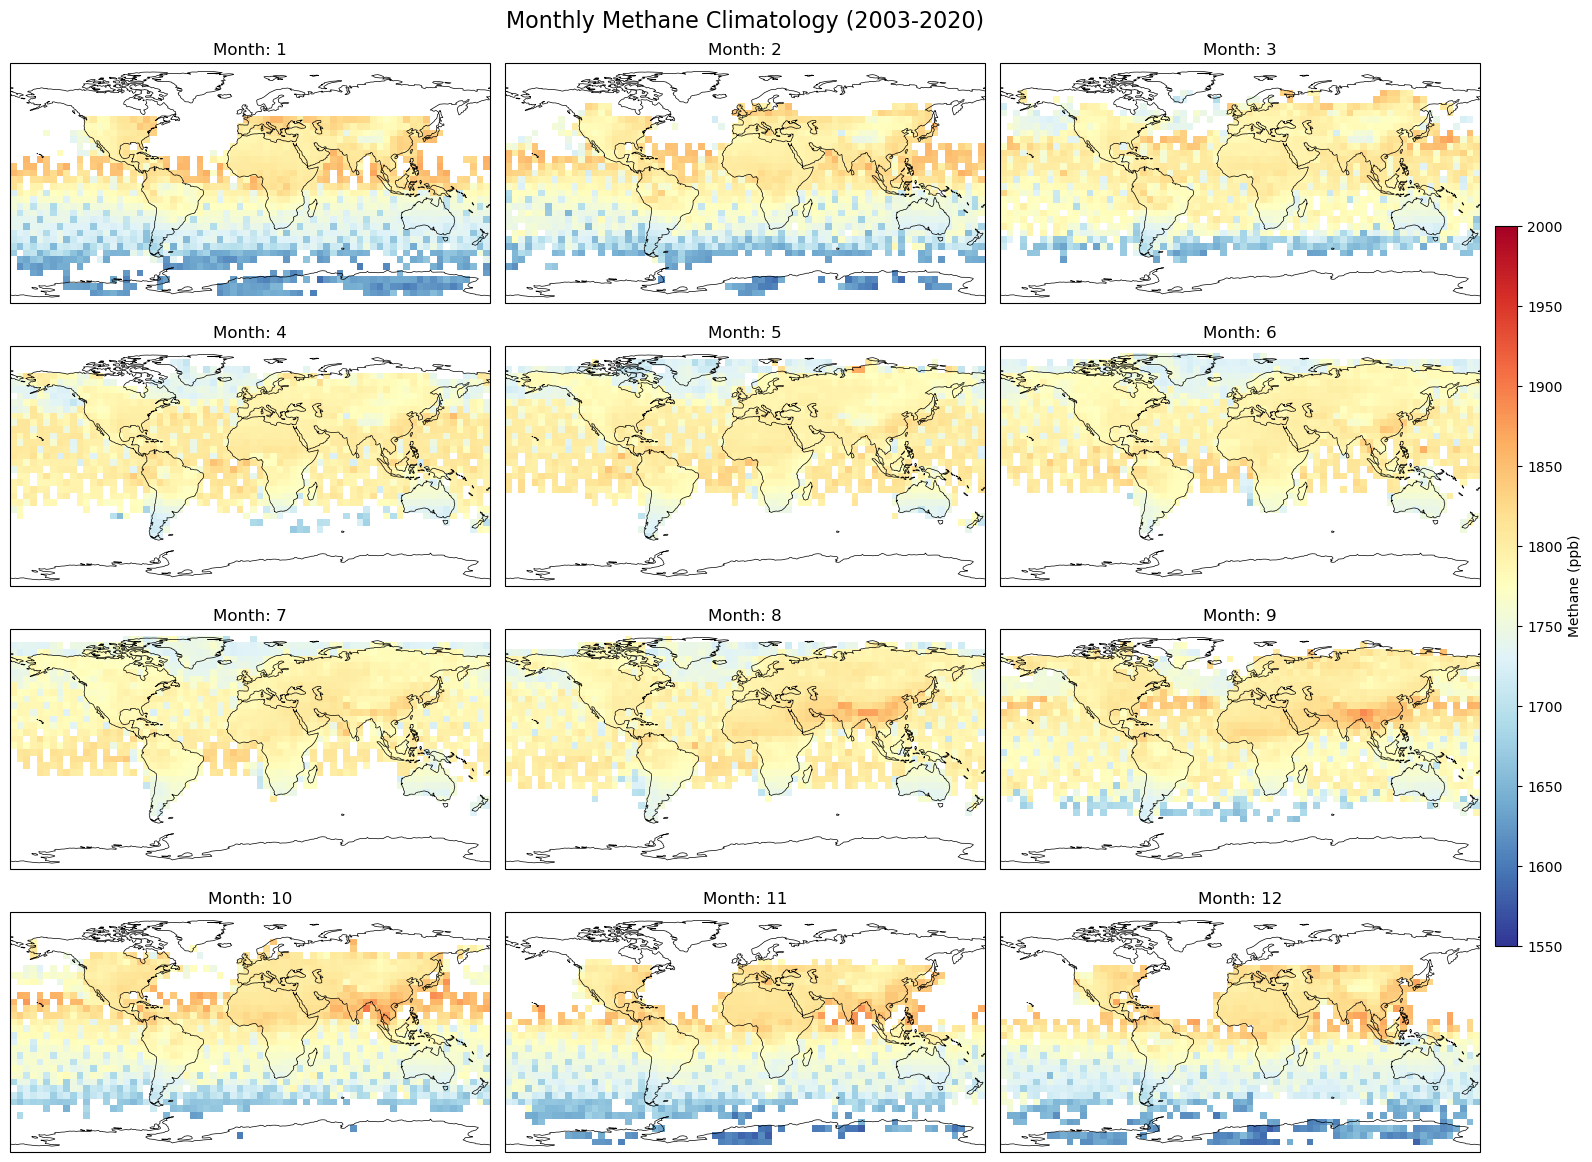

In [4]:
#1.1 Compute methane climatology for each month, and plot your results in 12 panels.
#将甲烷数据按照月分组并求平均值
methane_2=methane_1.groupby('time.month').mean(dim='time')
# 创建画布
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12),subplot_kw={'projection': ccrs.PlateCarree()})
fig.suptitle("Monthly Methane Climatology (2003-2020)", fontsize=16)
#将子图变为一纬数据，以便后续循环
axes = axes.flatten()
# 遍历 12 个月
for month in range(1, 13):
    ax = axes.flat[month - 1]  # 获取子图
    pcm = methane_2.sel(month=month).plot(
        ax=ax, cmap="RdYlBu_r", vmin=1550, vmax=2000, 
        add_colorbar=False,shading="auto"
    )
    ax.coastlines(resolution='110m', color='black', linewidth=0.5)
    ax.set_title(f"Month: {month}")
#建立一个总的色标
cbar_ax = fig.add_axes([1, 0.2, 0.015, 0.6])
fig.colorbar(pcm, cax=cbar_ax, label="Methane (ppb)")
plt.tight_layout()
plt.show()

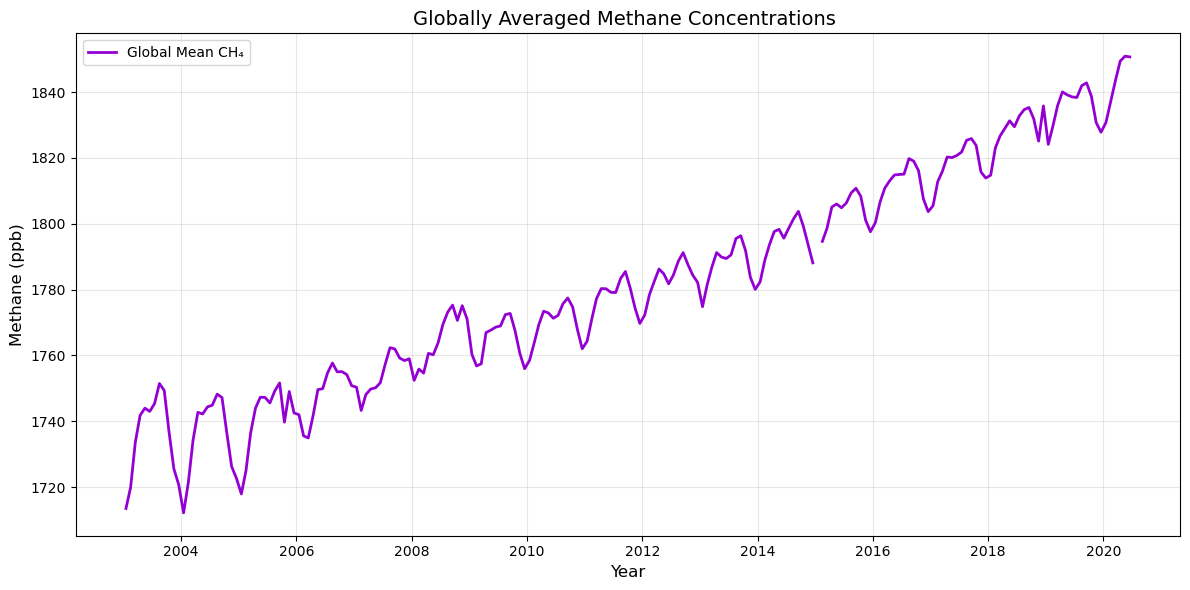

总增长量: 137.18 ppb
甲烷浓度从2003年到2020年呈现持续上升的趋势，总增长量: 137.18 ppb,在整体上升过程中，存在年度或季节性波动。


In [5]:
#1.2Plot globally-averaged methane from 2003-01 to 2020-06 as a time series. Describe your results. Check your plot with this one.

#计算面积加权全球平均（考虑纬度权重）
lat_weights = np.cos(np.deg2rad(ds.lat))

# 计算全球平均（按时间和空间）
global_mean = methane_1.weighted(lat_weights).mean(dim=('lon', 'lat')) 

# 绘制时间序列
plt.figure(figsize=(12, 6))
global_mean.plot(color='darkviolet', linewidth=2, label='Global Mean CH₄')

plt.title('Globally Averaged Methane Concentrations ', fontsize=14)
plt.ylabel('Methane (ppb)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# 描述结果
print(f"总增长量: {global_mean.sel(time='2020-06').values[0] - global_mean.sel(time='2003-01').values[0]:.2f} ppb")
print('甲烷浓度从2003年到2020年呈现持续上升的趋势，'+(
    f"总增长量: {global_mean.sel(time='2020-06').values[0] - global_mean.sel(time='2003-01'
                                                                        ).values[0]:.2f} ppb")+',在整体上升过程中，存在年度或季节性波动。')

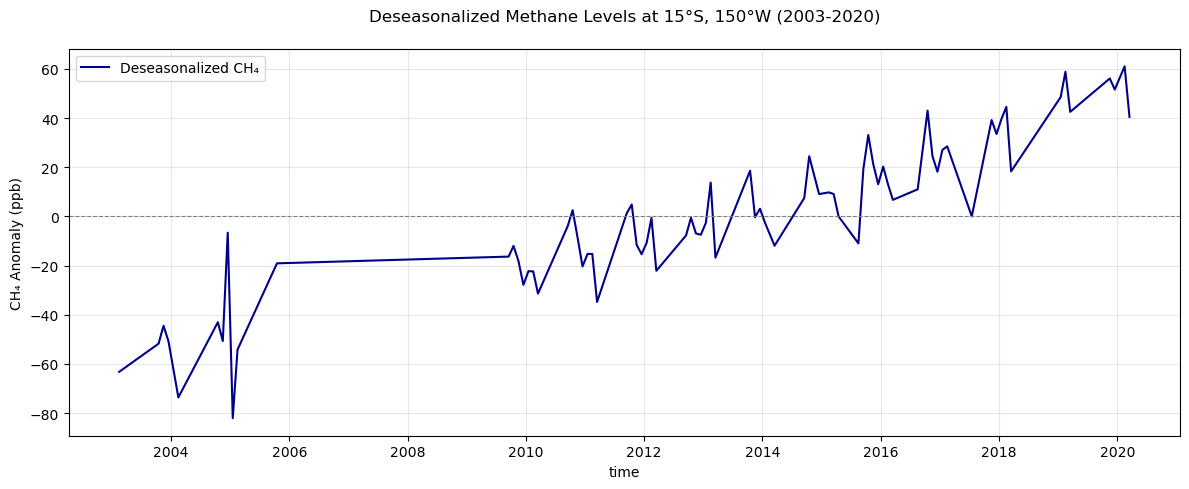

2003-2020年间甲烷异常值持续攀升，由负值区域（低于季节均值）逐步转为正值（高于季节均值），后期增长斜率明显增大.早期（2003-2010）年际波动幅度较大且不规则，中后期（2010-2020）波动频率与幅度同步增强。


In [11]:
#1.3Plot deseasonalized methane levels at point [15°S, 150°W] from 2003-01 to 2020-06 as a time series. Describe your results.
#提取最近[15°S, 150°W]的数据
point = methane_1.sel(lat=-15, lon=-150, method='nearest') 
#删去时间缺失点，以免图形不连续
point_ = point.dropna(dim="time")
# 计算每月气候均值（长期平均值）
climatology = point_.groupby('time.month').mean('time')  
# 去季节化：原始数据减去气候均值
deseasonalized = point_.groupby('time.month') - climatology
#画图
plt.figure(figsize=(12, 5))
deseasonalized.sel(time=slice('2003-01', '2020-06')).plot(
    label='Deseasonalized CH₄', 
    color='darkblue', 
    linewidth=1.5
)
plt.title('Deseasonalized Methane Levels at 15°S, 150°W (2003-2020)', pad=20)
plt.ylabel('CH₄ Anomaly (ppb)')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8) 
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#描述结果
print('2003-2020年间甲烷异常值持续攀升，由负值区域（低于季节均值）逐步转为正值（高于季节均值），后期增长斜率明显增大.'+
      '早期（2003-2010）年际波动幅度较大且不规则，中后期（2010-2020）波动频率与幅度同步增强。')

In [14]:
#2
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline
#提取文件
ds = xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")
#提取nino3.4区域
nino34_=ds['sst'].sel(lat=slice(-5,5),lon=slice(190,240))

#加权面积法
lat_weights = np.cos(np.deg2rad(nino34_.lat))
nino34_sst = nino34_.weighted(lat_weights).mean(dim=('lon', 'lat')) 

#2.1 Compute monthly climatology for SST from Niño 3.4 region, and subtract climatology from SST time series to obtain anomalies.
# 计算月度气候态
climatology = nino34_sst.groupby('time.month').mean()

#计算3个月滑动平均
nino34_3m = nino34_sst.rolling(time=3, center=True).mean()

#计算加权异常值
nino34_anom = nino34_sst.groupby('time.month') - climatology

# 计算3个月的滑动平均异常值
nino34_3m_anom = nino34_3m.groupby('time.month') - climatology 

In [15]:
#2.2 Visualize the computed Niño 3.4.    I got inspired by reading bilibili
# 定义阈值
threshold = 0.5  
min_duration = 5  

# 标记 El Niño / La Niña 事件
#先初始化events
events = xr.DataArray(
    np.zeros(len(nino34_3m_anom), dtype=int),
    dims=('time',),
    coords={'time': nino34_3m_anom.time},
)

# 标记异常超过阈值的月份
#La Niña
events = events.where(nino34_3m_anom < threshold, -1) 
#El Niño
events = events.where(nino34_3m_anom > -threshold, 1) 
#正常是0
events = events.fillna(0)

# 检测持续事件（5个月或更长）
def detect_events(da, threshold, min_duration):
    in_event = False       # 是否处于事件中
    event_type = 0         # 0: 无事件, 1: El Niño, -1: La Niña
    start_idx = None       # 事件起始索引
    event_labels = np.zeros(len(da), dtype=int)  # 存储最终标记

    for i in range(len(da)):
        if da[i] > threshold:  # 可能 El Niño
            if not in_event or event_type == 1:
                if not in_event:
                    start_idx = i  # 记录起始点
                in_event = True
                event_type = 1
            else:  # 如果之前是 La Niña，先结束
                if in_event and (i - start_idx + 1) >= min_duration:
                    event_labels[start_idx:i+1] = 1  # 标记 El Niño
                in_event = False
        elif da[i] < -threshold:  # 可能 La Niña
            if not in_event or event_type == -1:
                if not in_event:
                    start_idx = i
                in_event = True
                event_type = -1
            else:  # 如果之前是 El Niño，先结束
                if in_event and (i - start_idx + 1) >= min_duration:
                    event_labels[start_idx:i+1] = -1  # 标记 La Niña
                in_event = False
        else:  # 温度异常在阈值内
            if in_event and (i - start_idx + 1) >= min_duration:
                event_labels[start_idx:i] = event_type  # 标记有效事件
            in_event = False
            event_type = 0


    return xr.DataArray(event_labels, dims=('time',), coords={'time': da.time})
# 检测事件
el_nino_events = detect_events(nino34_3m_anom, threshold=0.5, min_duration=5)
la_nina_events = detect_events(-nino34_3m_anom, threshold=0.5, min_duration=5)  # 取负值检测 La Niña

# 合并结果（1: El Niño, -1: La Niña, 0: 正常）
final_events = el_nino_events - la_nina_events

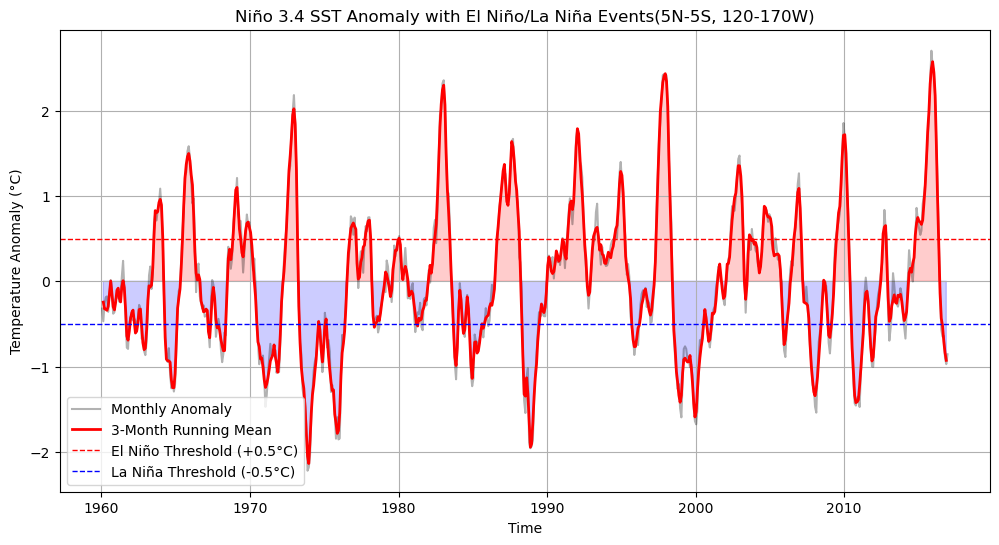

In [97]:

plt.figure(figsize=(12, 6))

# 绘制 Niño 3.4 异常和 3 个月滑动平均
plt.plot(nino34_anom.time, nino34_anom, 'k-', alpha=0.3, label='Monthly Anomaly')
plt.plot(nino34_3m_anom.time, nino34_3m_anom, 'r-', linewidth=2, label='3-Month Running Mean')

# 标记 El Niño / La Niña 事件
el_nino_times = final_events.time[final_events == 1]
la_nina_times = final_events.time[final_events == -1]

for t in el_nino_times:
    plt.axvspan(t - pd.Timedelta(days=15), t + pd.Timedelta(days=45), color='red', alpha=0.2)
for t in la_nina_times:
    plt.axvspan(t - pd.Timedelta(days=15), t + pd.Timedelta(days=45), color='blue', alpha=0.2)

plt.fill_between(
    nino34_3m_anom.time,
    nino34_3m_anom,
    0,
    where=(nino34_3m_anom > 0),
    color='red',
    alpha=0.2,
)

# 填充 0 刻度线以下的区域（蓝色）
plt.fill_between(
    nino34_3m_anom.time,
    nino34_3m_anom,
    0,
    where=(nino34_3m_anom < 0),
    color='blue',
    alpha=0.2,
)


plt.axhline(0.5, color='red', linestyle='--', linewidth=1, label='El Niño Threshold (+0.5°C)')
plt.axhline(-0.5, color='blue', linestyle='--', linewidth=1, label='La Niña Threshold (-0.5°C)')

plt.title('Niño 3.4 SST Anomaly with El Niño/La Niña Events(5N-5S, 120-170W)')
plt.xlabel('Time')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()
plt.grid()
plt.show()

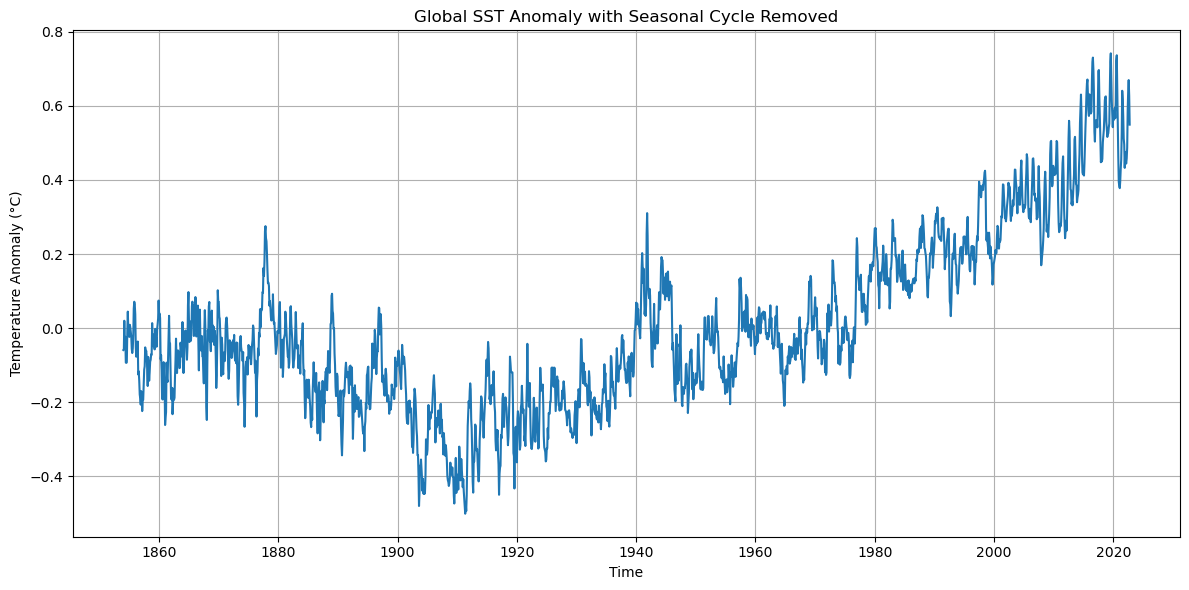

In [89]:
#3
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline

#加载数据集
ds = xr.open_dataset("sst.mnmean.nc", engine="netcdf4", decode_times=True)
sst = ds['sst']  

#3.1  Plot a time series of a certain variable with monthly seasonal cycle removed.
# 按月份分组计算平均值
sst_climatology = sst.groupby('time.month').mean('time')

# 去除季节性循环
# 首先为原始数据添加月份坐标以便对齐
sst_with_month = sst.assign_coords(month=sst['time.month'])

# 然后减去对应月份的气候学均值
sst_anomaly = sst_with_month.groupby('month') - sst_climatology

sst_global_anomaly = sst_anomaly.mean(dim=['lon', 'lat'])

# 绘制时间序列图
plt.figure(figsize=(12, 6))
sst_global_anomaly.plot()
plt.title('Global SST Anomaly with Seasonal Cycle Removed')
plt.xlabel('Time')
plt.ylabel('Temperature Anomaly (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()

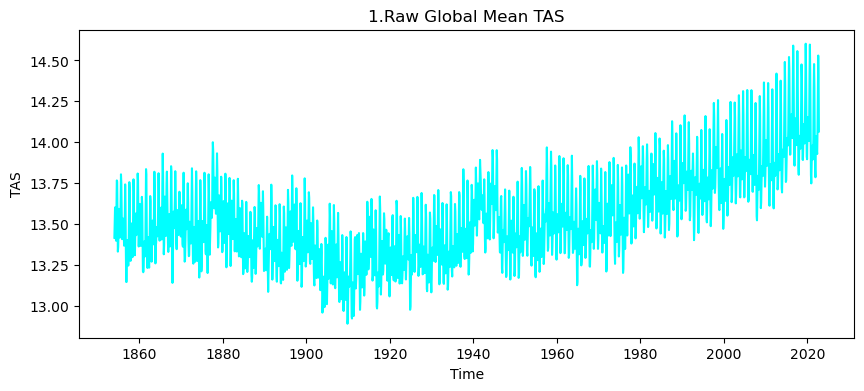

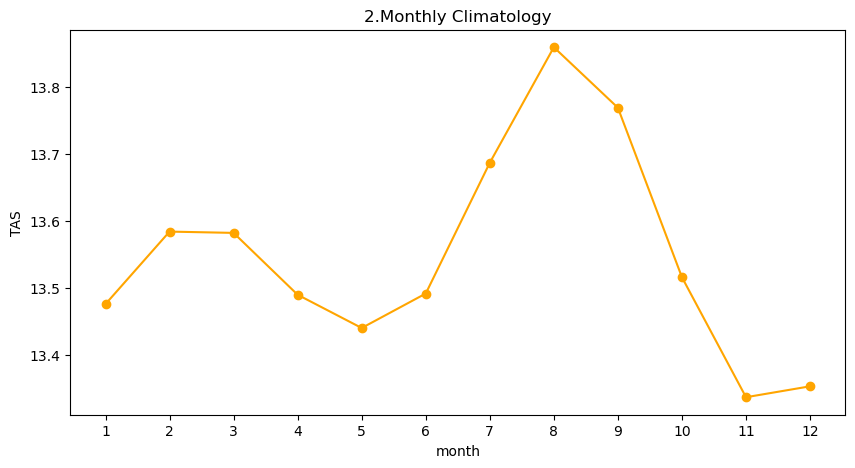

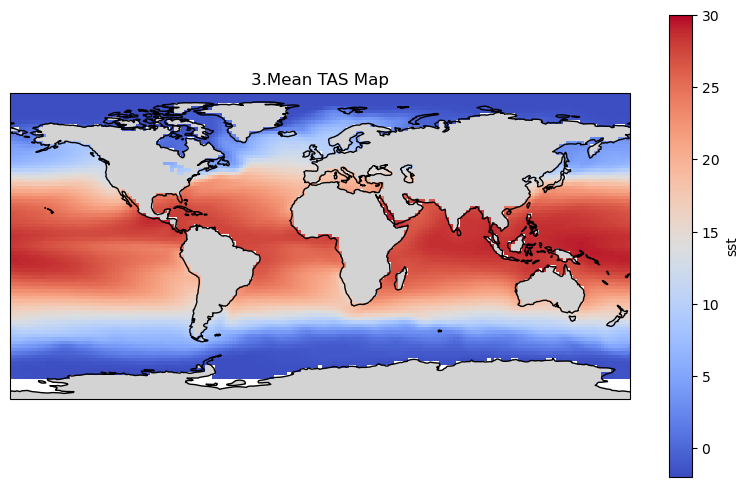

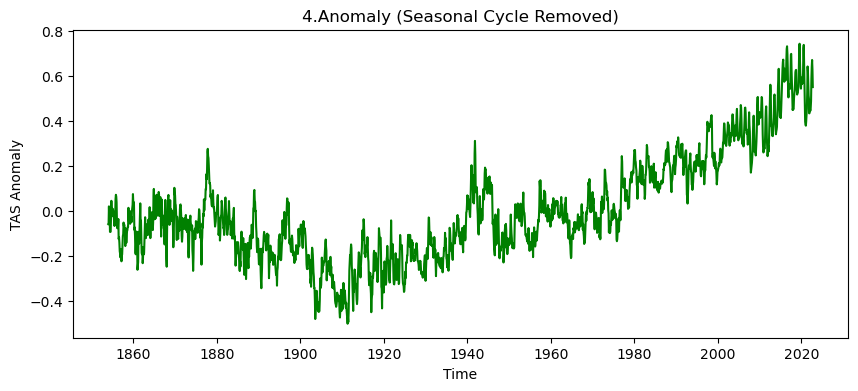

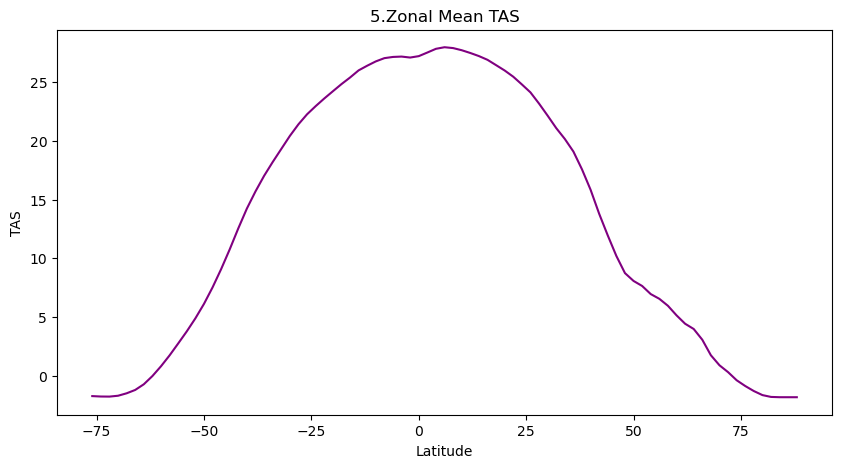

In [96]:
#3.2Make at least 5 different plots using the dataset.
# --------------------------------
# 图1: 原始全球平均TAS时间序列
# --------------------------------
global_mean = sst.mean(dim=['lon', 'lat'])
plt.figure(figsize=(10, 4))
global_mean.plot(color='cyan')
plt.title('1.Raw Global Mean TAS')
plt.ylabel('TAS')
plt.show()

# --------------------------------
# 图2: 月气候学（季节循环）
# --------------------------------
monthly_clim = sst.groupby('time.month').mean('time')
plt.figure(figsize=(10, 5))
monthly_clim.mean(dim=['lon', 'lat']).plot(marker='o', color='orange')
plt.title('2.Monthly Climatology')
plt.ylabel('TAS')
plt.gca().set_xticks(range(1, 13))
plt.show()

# --------------------------------
# 图3: 平均TAS空间分布
# --------------------------------
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
sst_clim_mean = monthly_clim.mean(dim='month')  # 年平均空间场
contour = sst_clim_mean.plot(transform=ccrs.PlateCarree(), cmap='coolwarm', 
                            vmin=-2, vmax=30, add_colorbar=True)
ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='lightgray')
plt.title('3.Mean TAS Map')
plt.show()

# --------------------------------
# 图4: 去除季节循环后的异常
# --------------------------------
anomaly = sst.groupby('time.month') - monthly_clim
global_anomaly = anomaly.mean(dim=['lon', 'lat'])
plt.figure(figsize=(10, 4))
global_anomaly.plot(color='green')
plt.title('4.Anomaly (Seasonal Cycle Removed)')
plt.ylabel('TAS Anomaly')
plt.show()

# --------------------------------
# 图5: 经向平均TAS（示例：赤道区域）
# --------------------------------
zonal_mean = sst.mean(dim='lon')
plt.figure(figsize=(10, 5))
zonal_mean.mean(dim='time').plot(color='purple')  # 或选择特定时间范围
plt.title('5.Zonal Mean TAS')
plt.ylabel('TAS')
plt.xlabel('Latitude')
plt.show()

